In [6]:
# ! pip install pyvis
! pip install -q netgraph


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
! python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from netgraph import Graph

# Undirected Graphs

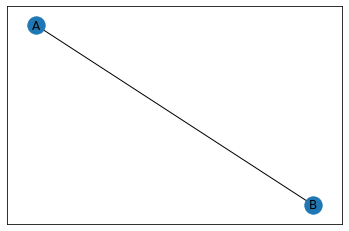

In [9]:
G = nx.Graph()
G.add_edge('A', 'B')

# G.pos = nx.spring_layout(G)

nx.draw_networkx(G)

In [10]:
G.nodes() # automatically added

NodeView(('A', 'B'))

In [11]:
G.edges()

EdgeView([('A', 'B')])

In [12]:
list(G.edges())

[('A', 'B')]

### Adding and removing edges weight

In [13]:
G.add_edge('A', 'B', weight=6)
G.edges()

EdgeView([('A', 'B')])

In [14]:
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 6})])

In [15]:
G.edges['A', 'B']

{'weight': 6}

In [16]:
G.edges['B', 'A']

{'weight': 6}

In [17]:
G['A']

AtlasView({'B': {'weight': 6}})

In [47]:
G.add_edge('A', 'D', weight=62)

In [48]:
G.remove_edge('A', 'D')

### Adding edge attributes

In [18]:
G.add_edge('B', 'C', relation='bridge')
G.edges()

EdgeView([('A', 'B'), ('B', 'C')])

In [19]:
G.edges['B', 'C']

{'relation': 'bridge'}

### Visualize weights and attributes

{('A', 'B'): Text(-0.47164162410334265, 0.4001986861539593, '9th Avenue'),
 ('B', 'C'): Text(0.5000000000000001, -0.4242614155619127, '10th Avenue')}

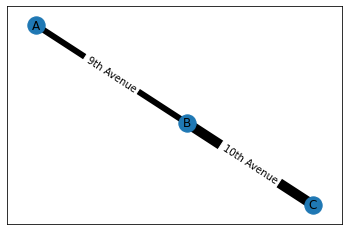

In [23]:
G = nx.Graph()
G.add_edge('A', 'B', weight=6, relation='9th Avenue')
G.add_edge('B', 'C', weight=10, relation='10th Avenue')

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])

labels = nx.get_edge_attributes(G,'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [24]:
net = Network('700px', '700px', notebook=True)

In [25]:
edges_length = {(a, b): w/10 for a, b, w in G.edges(data='weight')}
edges_length

{('A', 'B'): 0.6, ('B', 'C'): 1.0}

### Visualizing Distance (with netgraph)

/home/ismail/.local/lib/python3.10/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


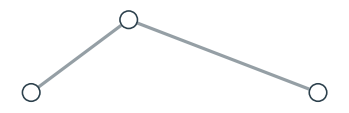

In [26]:
net.from_nx(G)
fig, ax = plt.subplots()

Graph(list(edges_length.keys()), node_layout='geometric', node_layout_kwargs=dict(edge_length=edges_length), ax=ax)
ax.set_aspect('equal')
plt.show()

### Adding node properties

In [38]:
G.add_node('A', role="President")

In [39]:
G.nodes(data=True)

NodeDataView({'A': {'size': 10, 'country': 'Morocco', 'role': 'President'}, 'B': {'size': 10}, 'C': {'size': 10}})

In [40]:
G['A']

AtlasView({'B': {'relation': '9th Avenue', 'width': 6}})

In [41]:
G.add_node('A', country="Morocco")

In [42]:
G.nodes(data=True)['A']

{'size': 10, 'country': 'Morocco', 'role': 'President'}

# Directed Graphs

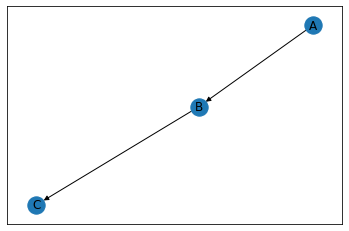

In [27]:
D = nx.DiGraph()
D.add_edge('A', 'B')
D.add_edge('B', 'C')

nx.draw_networkx(D)

In [28]:
('A', 'B') in D.edges()

True

In [29]:
('B', 'A') in D.edges()

False

In [30]:
D.edges()

OutEdgeView([('A', 'B'), ('B', 'C')])

## Multigraphs

Multigraphs are graphs that can have multiple edges between the same nodes

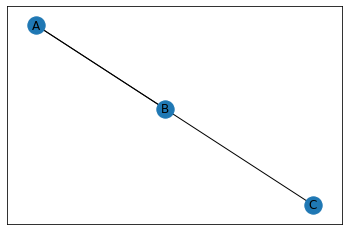

In [31]:
M = nx.MultiGraph()
M.add_edge('A', 'B', relation="family", weight=6)
M.add_edge('B', 'A', relation="family", weight=8)
M.add_edge('C', 'B', relation="family", weight=10)

pos = nx.spring_layout(M)
nx.draw_networkx(M, pos)

# labels = nx.get_edge_attributes(M,'weight')
# nx.draw_networkx_edge_labels(M, pos, edge_labels=labels)
# !! draw_networkx_edge_labels does not support multiedges. !!

In [32]:
# listing all edges between A and B
M['A']['B']

AtlasView({0: {'relation': 'family', 'weight': 6}, 1: {'relation': 'family', 'weight': 8}})

In [33]:
M['A']['B'][0]['weight'] = 5
M['A']['B'][0]['weight']

5

### Directed Multigraph

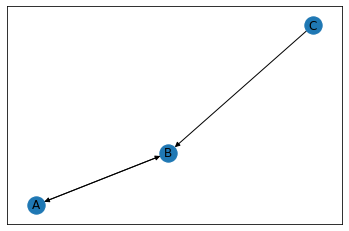

In [34]:
DM = nx.MultiDiGraph()
DM.add_edge('A', 'B', relation="family", weight=6)
DM.add_edge('B', 'A', relation="family", weight=8)
DM.add_edge('C', 'B', relation="family", weight=10)

pos = nx.spring_layout(DM)
nx.draw_networkx(DM, pos)


# Bipartite Graphs

A graph whose nodes can be split into two sets L and R such that every edge connects a node in L to a node in R

Eg. "Categories" (companies and workers, movies and directors, teams and fans..)

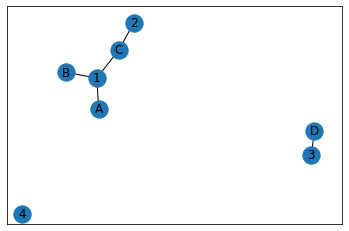

In [45]:
B = nx.Graph()
B.add_nodes_from(['A', 'B', 'C', 'D'], bipartite='L')
B.add_nodes_from(['1', '2', '3', '4'], bipartite='R')
B.add_edges_from([('A', '1'), ('B', '1'), ('C', '1'), ('C', '2'), ('D', '3')])

nx.draw_networkx(B)

<div class="alert alert-block alert-info"> You can study bipartite graphs by importing <b>bipartite</b> from <u>networkx.algorithms</u>.</div>

In [60]:
nx.bipartite.is_bipartite(B)

True

In [49]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C', 'D'])

True

In [50]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C'])

False

In [51]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C', 'D', '4'])

True

In [52]:
nx.bipartite.sets(B)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [57]:
B.add_edge('D', '4')
B.add_edge('C', '4')

In [58]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C', 'D', '4'])

False

In [59]:
nx.bipartite.sets(B)

({'A', 'B', 'C', 'D'}, {'1', '2', '3', '4'})

### Bipartite Graph projection